*style sheets - 样式表*

style包增加了简便切换图表样式的支持，基于同样的rc文件参数。

# 使用样式表

matplotlib提供了一些预定义的样式。如一个预定义样式表名为"ggplot"，它模仿了R的ggplot包。使用这个样式只需调用```plt.style.use('ggplot')```

一个完整的例子：  

<span id=237>Style sheets - 237</span>  
**[Bayesian Methods for Hackers style sheet](https://matplotlib.org/gallery/style_sheets/bmh.html)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.ioff()

In [3]:
np.random.seed(19680801)

plt.style.use('bmh')

def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=10000),
            histtype="stepfilled", bins=25, alpha=0.8, density=True)

fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()

Text(0.5, 1.0, "'bmh' style sheet")

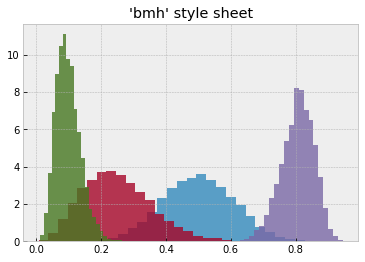

In [4]:
plt.show()

[Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)是一本书

```plt.style.available```包含所有可用的样式表

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# 自定义样式

我们也可以自定义样式，之后通过样式表的路径或URL调用style.use方法使用它们。

举个例子，我们新建一个文本文件，路径为"./images/presentation.mplstyle"，把下面的内容粘贴到文件中，
```
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
```
保存文件后，我们就可以```plt.style.use('./images/presentation.mplstyle')```把新定义的样式表应用到图表中。

或者通过将样式表文件放入mpl_configdir/stylelib使得matplotlib知晓这样就可以如同预定义样式一般的调用了。缺省时mpl_configdir应是~/.config/matplotlib 应用matplotlib.get_configdir() 可查看系统配置，有可能我们需要新建此目录。我们还可以通过设置环境变量MPLCONFIGDIR变更文件夹路径。

需要注意的是如果mpl_configdir/stylelib文件夹中的自定义样式表与预定义样式表同名，预定义表将被覆盖。

# 组合样式表

我们可以有一个样式表定义颜色，另一个样式表定义元素的尺寸。通过传入样式表列表，可以很容易的将表组合在一起。
```python
plt.style.use(['dark_background', 'presentation'])
```
需要注意的是，多个表中有相同的参数时右边的会覆盖左边的。

# 短期风格

如果我们仅想在特定的一段代码块中应用样式表而不想改变全局风格。style包提供了上下文管理器将变化限制在特定的范围内。
```python
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()
```

*rcParams - 资源配置参数*

# 动态设置

我们可以用脚本的方式或交互的方式动态改变rc的缺省设置。所有rc的配置内容都保存在一个名为matplotlib.rcParams类似字典型的变量中。对于matplotlib这是一个全局变量。rcParams可以直接修改。
```python
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(data)
```
注意对于颜色必须更改axes的prop_cycle属性：
```python
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red
```
matplotlib也为变更rc设置提供了一对便利函数。matplotlib.rc被用于一次变更一组的多个参数。
```python
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)
```
matplotlib.rcdefaults将重新加载标准的默认设置。

设置rcParams的值时需要进行一定程度的验证，参见matplotlib.rcsetup。

# matplotlibrc文件

matplotlib使用matplotlibrc文件定义所有类型的参数，被称为"rc setting"或"rc parameters"。我们可以控制Matplotlib中几乎每个属性的默认值：: figure size 与 DPI, line width, color 与 style, axes, axis 与 grid properties, text 与 font properties 等。 当调用style.use('<path>/<style-name>.mplstyle')时未指定URL或路径，matplotlib将在4个位置查找matplotlibrc文件，以如下次序：
1. 当前工作目录中的matplotlibrc，通常用于您不想在其他地方应用的特定自定义设置。
2. $MATPLOTLIBRC 定义的文件，或 $MATPLOTLIBRC/matplotlibrc
3. 特定于用户的位置，依赖于平台。例如：.matplotlib/matplotlibrc . See matplotlib configuration and cache directory locations.
4. INSTALL/matplotlib/mpl-data/matplotlibrc, 这里的INSTALL在Linux中类似于 /usr/lib/python3.7/site-packages , 在Windows中或许是 C:\Python37\Lib\site-packages . 每一次安装matplotlib都会覆盖这个文件, 所以相应保存配置, 将此文件移动至用户目录下的.matplotlib目录。
    
搜到即停。
    
```matplotlib.matplotlib_fname()```为当前加载的文件。